In [1]:
import numpy as np
import pandas as pd
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import SnowballStemmer

In [2]:
doc1 = "This is a very good and plain paper this is really \
good and interesting"
doc2 = "This paper is very interesting awesome"

In [3]:
def clean_txt(sent):
    tokens = word_tokenize(sent.lower())
    stemmer_s = SnowballStemmer("english")
    stop_updated = stopwords.words("english") + list(punctuation) 
    final_word = [stemmer_s.stem(term) for term in tokens if term not in stop_updated 
               and len(term) > 2] 
    res = " ".join(final_word)
    return res

In [4]:
doc1_clean = clean_txt(doc1)
doc1_clean

'good plain paper realli good interest'

In [5]:
doc2_clean = clean_txt(doc2)
doc2_clean

'paper interest awesom'

In [6]:
doc0_clean = 'good plain paper really good interesting'
dec1_clean = 'paper interesting awesome'

In [7]:
doc = pd.DataFrame([doc0_clean, dec1_clean], columns=["text"])
doc

,text
0,good plain paper really good interesting
1,paper interesting awesome


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
count_vectorizer = CountVectorizer()

In [10]:
X = count_vectorizer.fit_transform( doc['text'] )

In [16]:
pd.DataFrame( X ).iloc[ 0 , 0 ].toarray()


array([[0, 2, 1, 1, 1, 1]], dtype=int64)

In [76]:
X.toarray()

array([[0, 2, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0]], dtype=int64)

In [77]:
X.todense()

matrix([[0, 2, 1, 1, 1, 1],
        [1, 0, 1, 1, 0, 0]], dtype=int64)

In [78]:
count_vectorizer.get_feature_names()

['awesome', 'good', 'interesting', 'paper', 'plain', 'really']

In [79]:
count_vectorizer.vocabulary_

{'good': 1,
 'plain': 4,
 'paper': 3,
 'really': 5,
 'interesting': 2,
 'awesome': 0}

In [80]:
DTM = pd.DataFrame( X.toarray() , columns = count_vectorizer.get_feature_names() )
DTM 

,awesome,good,interesting,paper,plain,really
0,0,2,1,1,1,1
1,1,0,1,1,0,0


In [81]:
TDM = DTM.T
TDM

,0,1
awesome,0,1
good,2,0
interesting,1,1
paper,1,1
plain,1,0
really,1,0


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf_vect = TfidfVectorizer()

In [84]:
tfidf = tfidf_vect.fit_transform( doc['text'] )
tfidf

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [85]:
tfidf.toarray()

array([[0.        , 0.75525556, 0.26868528, 0.26868528, 0.37762778,
        0.37762778],
       [0.70490949, 0.        , 0.50154891, 0.50154891, 0.        ,
        0.        ]])

In [86]:
df_tfidf = pd.DataFrame( tfidf.toarray() , columns = tfidf_vect.get_feature_names() )
df_tfidf

,awesome,good,interesting,paper,plain,really
0,0.000000,0.755256,0.268685,0.268685,0.377628,0.377628
1,0.704909,0.000000,0.501549,0.501549,0.000000,0.000000


In [87]:
## Computing ngrams : 

# 1) unigram - one word at a time 
# 2) bigram - two words at a time 
# 3) trigram - three words 

# any combination of above can be created by default the vectorizer's in sklear are :
# 1) CountVectorizer and TfidfVectorizer will perform on unigrams , i.e ngram_range = (1,1)
# to extract bigrams ngram_range = (2,2)
# to extract trigram ngram_range = (3,3)

In [88]:
count_vectorizer_bg = CountVectorizer( ngram_range = (2,2) )
X_bg = count_vectorizer_bg.fit_transform( doc['text'] )


In [89]:
print( count_vectorizer_bg.get_feature_names())

['good interesting', 'good plain', 'interesting awesome', 'paper interesting', 'paper really', 'plain paper', 'really good']


In [90]:
DTM_bg = pd.DataFrame( X_bg.toarray() , columns = count_vectorizer_bg.get_feature_names() )
DTM_bg

,good interesting,good plain,interesting awesome,paper interesting,paper really,plain paper,really good
0,1,1,0,0,1,1,1
1,0,0,1,1,0,0,0


In [95]:
count_vectorizer_tg = CountVectorizer( ngram_range=(3,3) )
X_tg = count_vectorizer_tg.fit_transform( doc['text'] )
print( count_vectorizer_tg.get_feature_names())
DTM_tg = pd.DataFrame( X_tg.toarray() , columns = count_vectorizer_tg.get_feature_names() )
DTM_tg

['good plain paper', 'paper interesting awesome', 'paper really good', 'plain paper really', 'really good interesting']


,good plain paper,paper interesting awesome,paper really good,plain paper really,really good interesting
0,1,0,1,1,1
1,0,1,0,0,0


In [97]:
count_vectorizer_u_bg = CountVectorizer( ngram_range=(1,2) )
X_u_bg = count_vectorizer_u_bg.fit_transform( doc['text'] )
print( count_vectorizer_u_bg.get_feature_names())
DTM_u_bg = pd.DataFrame( X_u_bg.toarray() , columns = count_vectorizer_u_bg.get_feature_names() )
DTM_u_bg

['awesome', 'good', 'good interesting', 'good plain', 'interesting', 'interesting awesome', 'paper', 'paper interesting', 'paper really', 'plain', 'plain paper', 'really', 'really good']


,awesome,good,good interesting,good plain,interesting,interesting awesome,paper,paper interesting,paper really,plain,plain paper,really,really good
0,0,2,1,1,1,0,1,0,1,1,1,1,1
1,1,0,0,0,1,1,1,1,0,0,0,0,0


In [98]:
count_vectorizer_u_bg = CountVectorizer( ngram_range=(1,3) ) # uni , bi , tri 
X_u_bg = count_vectorizer_u_bg.fit_transform( doc['text'] )
print( count_vectorizer_u_bg.get_feature_names())
DTM_u_bg = pd.DataFrame( X_u_bg.toarray() , columns = count_vectorizer_u_bg.get_feature_names() )
DTM_u_bg

['awesome', 'good', 'good interesting', 'good plain', 'good plain paper', 'interesting', 'interesting awesome', 'paper', 'paper interesting', 'paper interesting awesome', 'paper really', 'paper really good', 'plain', 'plain paper', 'plain paper really', 'really', 'really good', 'really good interesting']


,awesome,good,good interesting,good plain,good plain paper,interesting,interesting awesome,paper,paper interesting,paper interesting awesome,paper really,paper really good,plain,plain paper,plain paper really,really,really good,really good interesting
0,0,2,1,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1
1,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0


In [99]:
# instantiate the count vectorizer with max feature 
# take a column sum of your DTM and get the max n features 

count_vectorizer_max = CountVectorizer( max_features = 3 )

#fit -> extract the feature or BOW 
# transform - > computes the count for every feature extracted 

X_max = count_vectorizer_max.fit_transform( doc['text'] )


In [101]:
DTM_max = pd.DataFrame( X_max.toarray() , columns = count_vectorizer_max.get_feature_names() )
DTM_max

,good,interesting,paper
0,2,1,1
1,0,1,1


In [102]:
# Amazon review 

In [137]:
reviews = pd.read_excel("C:\\Users\\Administrator\\Desktop\\Python\\NLP\\Day 1\\K8 Reviews v0.2.xlsx")
reviews['review'] = reviews['review'].astype(str)
reviews.head(2)


,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."


In [138]:
reviews['review'] = reviews['review'].apply( clean_txt )

In [139]:
reviews.head(2)

,sentiment,review
0,1,good need updat improv
1,0,worst mobil bought ever batteri drain like hel...


In [140]:
review_cv_bg = CountVectorizer( ngram_range=(2,2) , max_features = 200 )
X_review_bg = review_cv_bg.fit_transform( reviews['review'] )

In [141]:
DTM_review_bg = pd.DataFrame( X_review_bg.toarray() , columns = review_cv_bg.get_feature_names() )
DTM_review_bg.head(3)

,4000 mah,4gb ram,also good,amaz phone,averag phone,awesom phone,back camera,back cover,backup good,bad experi,...,work fine,work good,work proper,work well,worst mobil,worst phone,worst product,worth buy,worth money,ðÿ ðÿ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


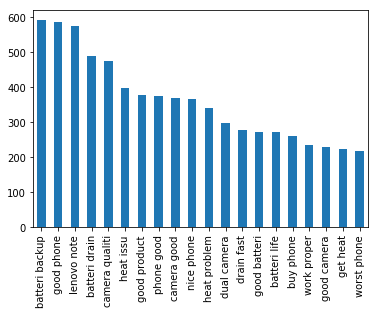

In [142]:
DTM_review_bg.sum().sort_values(ascending = False).head(20).plot( kind = 'bar')

In [134]:
df1 = DTM_review_bg.sum().reset_index()

df1[df1['index'].str.contains('drain')]

,index,0
18,battery drain,117
19,battery draining,156
20,battery drains,199
60,drain fast,56
61,draining fast,81
62,drains fast,109


In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [145]:
tfidf_v_r = TfidfVectorizer( ngram_range =(2,2) , max_features = 200 )
tfidf_r = tfidf_v_r.fit_transform( reviews['review'])

In [146]:
tfidf_r_df = pd.DataFrame( tfidf_r.toarray() , columns = tfidf_v_r.get_feature_names() )
tfidf_r_df.head(3)

,4000 mah,4gb ram,also good,amaz phone,averag phone,awesom phone,back camera,back cover,backup good,bad experi,...,work fine,work good,work proper,work well,worst mobil,worst phone,worst product,worth buy,worth money,ðÿ ðÿ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.811837,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [158]:
req_tfidf_r_df = tfidf_r_df[ [ 'batteri drain' ,  'good camera'] ]



In [169]:
req_tfidf_r_df['batteri drain'].reset_index().sort_values( by = ['batteri drain','index'] , ascending = [False,True] ).head(5)

,index,batteri drain
583,583,1.0
955,955,1.0
1320,1320,1.0
2332,2332,1.0
3476,3476,1.0


In [167]:
req_tfidf_r_df['good camera'].reset_index().sort_values( by = ['good camera','index'] , ascending = [False,True] ).head(5)

,index,good camera
1557,1557,1.0
2376,2376,1.0
2447,2447,1.0
2865,2865,1.0
3332,3332,1.0


In [168]:
# Check the below :
#     Numbers , Spelling , non ASCII characters 

In [23]:
import re
s = 'finalllllyyy'

re.sub( '(\w)\1{2,}' , '\1\1' , s )

'finalllllyyy'